In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

sales.csv   - Данные по продажам за ноябрь 2015 г. в детализации День – Магазин – Товар - Сумма_Продаж

txn.csv     - Данные по продажам за период [2015-10-01, 2015-11-29] в детализации День – Магазин – Товар – Чек - Сумма_Продаж.

art.csv     - Справочник товаров

store.csv   - Справочник магазинов

In [2]:
art = pd.read_csv('art.csv', sep=';')
sales = pd.read_csv('sales.csv', sep=';')
store = pd.read_csv('store.csv', sep=';')
txn = pd.read_csv('txn.csv', sep=';')

## Задание 1. 
### Рассчитать основные показатели: Средний чек магазина, среднее кол-во чеков на 1 магазин в день, средние продажи на 1 магазин в день (детализация до товара/группы не нужна). Сравнить эти показатели в октябре и ноябре между магазинами. Визуально представить результат.

In [3]:
#Преобразование строки c ценой в вещественное значение
txn['SALES'] = txn['SALES'].apply(lambda x: float(x.replace(',','.')))

In [4]:
#вычисление суммы чека по 1 магазину
txn_sum= txn.groupby('TXN')['SALES'].sum().reset_index().rename(columns={'SALES':'sum_price_txn'})
txn = pd.merge(txn, txn_sum, how='left', on='TXN')

In [5]:
txn.head()

,DAY,STORE,ART,TXN,TIME,SALES,sum_price_txn
0,2015-11-05,22691,16548710,5877969776,17:23:57,117.00,117.0000
1,2015-10-24,20581,261204,5767364168,19:57:19,140.17,405.5498
2,2015-11-05,1574,16405210,5876151937,15:31:35,26.90,26.9000
3,2015-10-29,1602,192539,5810625759,15:54:34,53.80,575.8000
4,2015-10-04,1579,16501864,5575346025,16:27:40,36.30,257.4000


Средняя цена чека на 1 магазин за октябрь и ноябрь

In [6]:
txn_price_mean = txn[['STORE','TXN','sum_price_txn']].drop_duplicates()
txn_price_mean =  txn.groupby('STORE')['sum_price_txn'].mean().reset_index()
txn_price_mean.head()

,STORE,sum_price_txn
0,956,427.167833
1,958,493.050574
2,961,562.129233
3,974,499.037848
4,980,470.808541


Среднее кол-во чеков на 1 магазин за октябрь и ноябрь

In [7]:
txn_count_mean = txn[['STORE','TXN','DAY']].drop_duplicates()
txn_count_mean = txn_count_mean.groupby(['STORE','DAY'])['TXN'].count().reset_index()
txn_count_mean = txn_count_mean.groupby('STORE')['TXN'].mean().round().reset_index()
txn_count_mean.head()

,STORE,TXN
0,956,561.0
1,958,475.0
2,961,428.0
3,974,264.0
4,980,244.0


Средние продажи на 1 магазин за октябрь и ноябрь

In [8]:
txn_art_mean = txn[['STORE','ART','TXN','DAY','TIME']].drop_duplicates()
txn_art_mean = txn_art_mean.groupby(['STORE','DAY'])['ART'].count().reset_index()
txn_art_mean = txn_art_mean.groupby('STORE')['ART'].mean().round().reset_index()
txn_art_mean.head()

,STORE,ART
0,956,2225.0
1,958,2138.0
2,961,2197.0
3,974,1176.0
4,980,1020.0


Средняя цена чека на 1 магазин в октябре и ноябре (по отдельности)

In [9]:
#ср цена чека на 1 магазин в октябре
txn_price_mean_oct = txn[['STORE','DAY','TXN','sum_price_txn']].drop_duplicates()
txn_price_mean_oct = txn_price_mean_oct[txn_price_mean_oct['DAY']<'2015-11-01']
txn_price_mean_oct =  txn_price_mean_oct.groupby('STORE')['sum_price_txn'].mean().reset_index().\
                                                rename(columns={'sum_price_txn':'price_mean_oct'})

#ср цена чека на 1 магазин в ноябре
txn_price_mean_nov = txn[['STORE','DAY','TXN','sum_price_txn']].drop_duplicates()
txn_price_mean_nov = txn_price_mean_nov[txn_price_mean_nov['DAY']>'2015-10-30']
txn_price_mean_nov =  txn_price_mean_nov.groupby('STORE')['sum_price_txn'].mean().reset_index().\
                                                rename(columns={'sum_price_txn':'price_mean_nov'})

In [10]:
txn_mean_diff = pd.merge(txn_price_mean_oct, txn_price_mean_nov, on='STORE')
txn_mean_diff['delta'] = txn_mean_diff['price_mean_nov']-txn_mean_diff['price_mean_oct']

Таблица со сравнением средних цен чеков на 1 магазин в октябре и ноябре

In [11]:
txn_mean_diff.head()

,STORE,price_mean_oct,price_mean_nov,delta
0,956,246.773296,253.981662,7.208366
1,958,287.510861,295.832331,8.321471
2,961,328.721461,336.312024,7.590563
3,974,266.282705,280.364903,14.082198
4,980,270.145947,265.298098,-4.847849


Визуализируем полученные результаты. Исходя из ниже приведенного графика, можно сделать вывод о том, что в большинстве магазинах, средняя цена чека в ноябре вросла

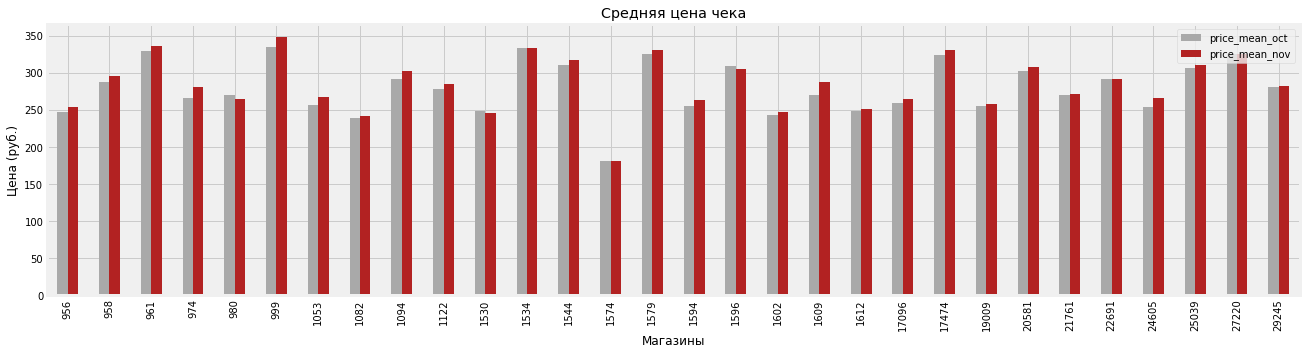

In [12]:
txn_mean_diff.plot(x='STORE', y=['price_mean_oct', 'price_mean_nov'], kind='bar', \
                   color=('darkgrey', 'firebrick'), figsize=(20,5))
plt.title('Средняя цена чека')
plt.xlabel('Магазины')
plt.ylabel('Цена (руб.)')
plt.show()

Среднее кол-во чеков на 1 магазин в октябре и ноябре (по отдельности)

In [13]:
#ср число чеков на магазин в октябре
txn_count_mean_oct = txn[['STORE','DAY','TXN']].drop_duplicates()
txn_count_mean_oct = txn_count_mean_oct[txn_count_mean_oct['DAY']<'2015-11-01']
txn_count_mean_oct = txn_count_mean_oct.groupby(['STORE','DAY'])['TXN'].count().reset_index()
txn_count_mean_oct = txn_count_mean_oct.groupby('STORE')['TXN'].mean().round().reset_index().\
                                                rename(columns={'TXN':'count_mean_oct'})

#ср число чеков на магазин в ноябре
txn_count_mean_nov = txn[['STORE','DAY','TXN']].drop_duplicates()
txn_count_mean_nov = txn_count_mean_nov[txn_count_mean_nov['DAY']>'2015-10-30']
txn_count_mean_nov = txn_count_mean_nov.groupby(['STORE','DAY'])['TXN'].count().reset_index()
txn_count_mean_nov = txn_count_mean_nov.groupby('STORE')['TXN'].mean().round().reset_index().\
                                                rename(columns={'TXN':'count_mean_nov'})

txn_mean_count_diff = pd.merge(txn_count_mean_oct, txn_count_mean_nov, on='STORE')
txn_mean_count_diff['delta'] = txn_mean_count_diff['count_mean_nov']-txn_mean_count_diff['count_mean_oct']

Визуализируем полученные результаты. Исходя из ниже приведенного графика, можно сделать вывод о том, что в большинстве магазинах, среднее кол-во чеков на 1 магазин в ноябре стало ниже.

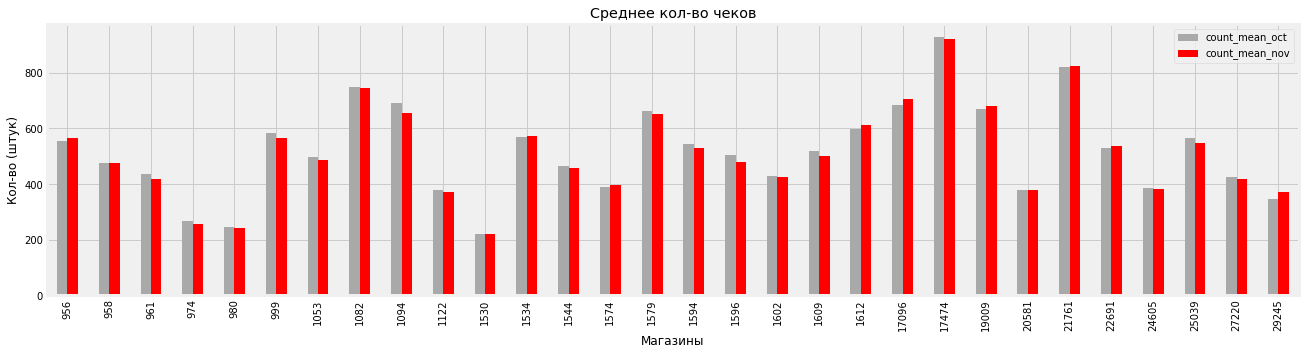

In [14]:
txn_mean_count_diff.plot(x='STORE', y=['count_mean_oct', 'count_mean_nov'], kind='bar', \
                   color=('darkgrey', 'red'), figsize=(20,5))
plt.title('Среднее кол-во чеков')
plt.xlabel('Магазины')
plt.ylabel('Кол-во (штук)')
plt.show()

Средние продажи на 1 магазин в октябре и ноябре (по отдельности)

In [15]:
#ср продажи на 1 маг в октябре
txn_art_mean_oct = txn[['STORE','ART','TXN','DAY','TIME']].drop_duplicates()
txn_art_mean_oct = txn_art_mean_oct[txn_art_mean_oct['DAY']<'2015-11-01']
txn_art_mean_oct = txn_art_mean_oct.groupby(['STORE','DAY'])['ART'].count().reset_index()
txn_art_mean_oct = txn_art_mean_oct.groupby('STORE')['ART'].mean().round().reset_index().\
                                                rename(columns={'ART':'art_mean_oct'})

#ср продажи на 1 маг в ноябре
txn_art_mean_nov = txn[['STORE','ART','TXN','DAY','TIME']].drop_duplicates()
txn_art_mean_nov = txn_art_mean_nov[txn_art_mean_nov['DAY']>'2015-10-30']
txn_art_mean_nov = txn_art_mean_nov.groupby(['STORE','DAY'])['ART'].count().reset_index()
txn_art_mean_nov = txn_art_mean_nov.groupby('STORE')['ART'].mean().round().reset_index().\
                                                rename(columns={'ART':'art_mean_nov'})

txn_art_mean_diff = pd.merge(txn_art_mean_oct, txn_art_mean_nov, on='STORE')
txn_art_mean_diff['delta'] = txn_art_mean_diff['art_mean_nov']-txn_art_mean_diff['art_mean_oct']

Визуализируем полученные результаты. Исходя из ниже приведенного графика, можно сделать вывод о том, что в части магазинах среднее продажи в день в ноябре увеличились, а где то наборот. 

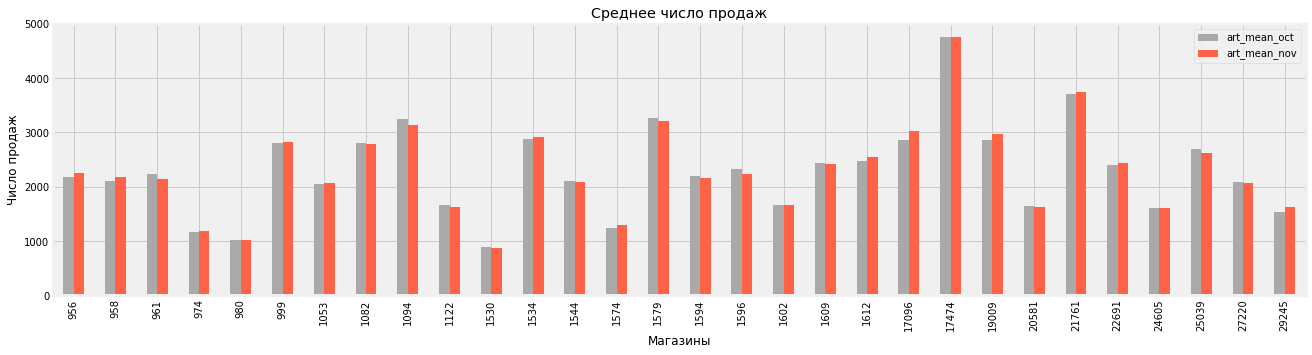

In [16]:
txn_art_mean_diff.plot(x='STORE', y=['art_mean_oct', 'art_mean_nov'], kind='bar', \
                   color=('darkgrey', 'tomato'), figsize=(20,5))
plt.title('Среднее число продаж')
plt.xlabel('Магазины')
plt.ylabel('Число продаж')
plt.show()

Сравнение разности средний показателей за ноябрь и октябрь

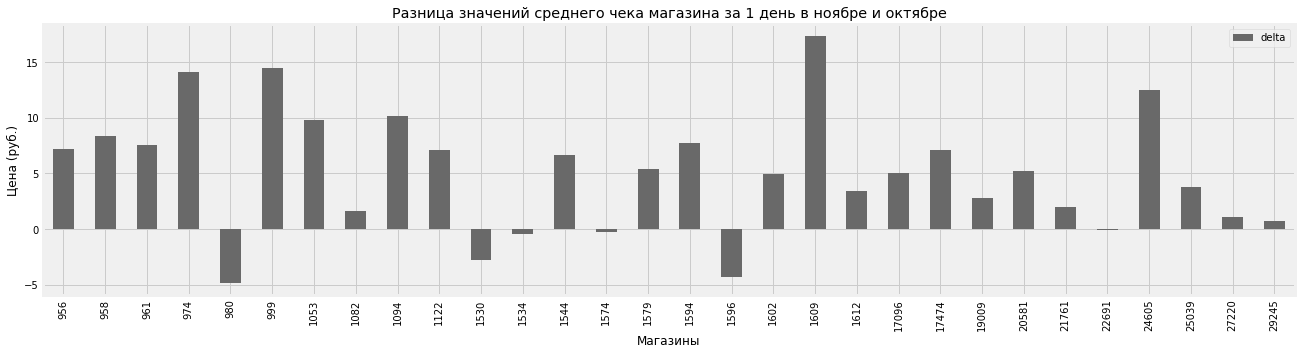

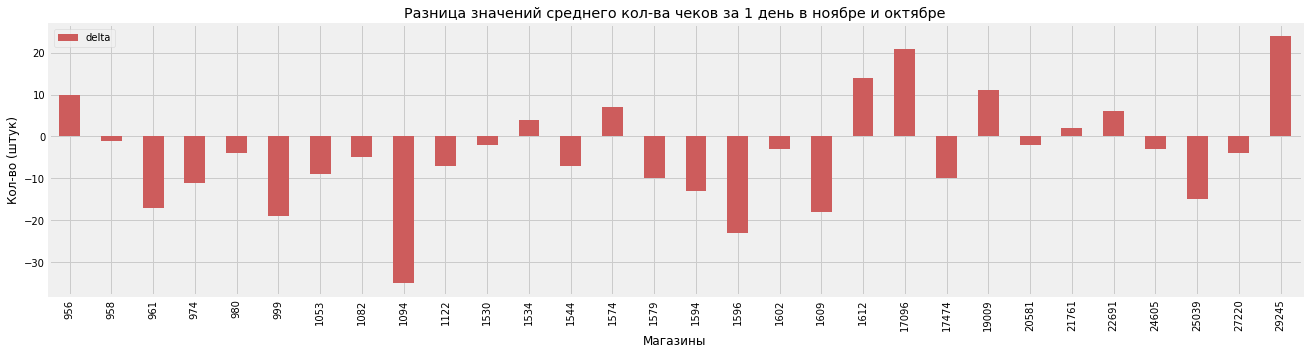

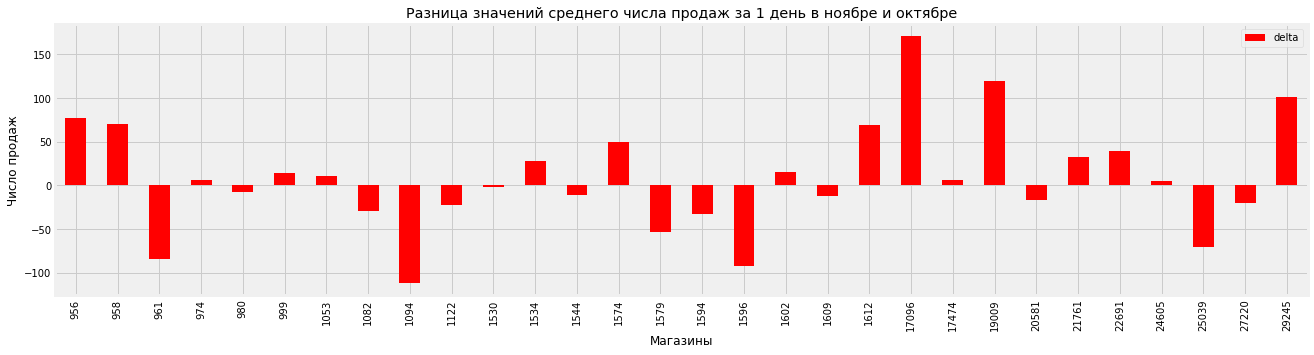

In [17]:
txn_mean_diff.plot(x='STORE', y='delta', kind='bar', figsize=(20,5),color='dimgray')
plt.title('Разница значений среднего чека магазина за 1 день в ноябре и октябре')
plt.xlabel('Магазины')
plt.ylabel('Цена (руб.)')
plt.show()

txn_mean_count_diff.plot(x='STORE', y='delta', kind='bar', figsize=(20,5),color='indianred')
plt.title('Разница значений среднего кол-ва чеков за 1 день в ноябре и октябре')
plt.xlabel('Магазины')
plt.ylabel('Кол-во (штук)')
plt.show()

txn_art_mean_diff.plot(x='STORE', y='delta', kind='bar', figsize=(20,5),color='r')
plt.title('Разница значений среднего числа продаж за 1 день в ноябре и октябре')
plt.xlabel('Магазины')
plt.ylabel('Число продаж')
plt.show()